## Gaussian 분포

평균과 분산으로 정의되는 Mono Variable 정규 분포로 하나의 변수에 대한 확률 밀도 함수를 제공한다.

$P_X(X) = \frac{1}{√2πσ}exp(-\frac{(X −µ)^2}{2σ^2})$

Muti Variable 정규 분포(MVN): 여러 변수 간의 상관 관계를 포함하여 PDF을 정의한다. 이 분포는 평균 벡터와 공분산 행렬로 표현되며, 여러 변수에 대한 결합 분포를 다룰 때 사용한다.

$N(x∣μ,Σ)=\frac{1}{(2π)^\frac{D}{2}∣Σ∣^\frac{1}{2}}exp(−\frac{1}{2}(x−μ)^TΣ^{−1}(x−μ))$

$D$: 차원 개수

$x$: 변수

$\mu = E[x]$: 평균 벡터

$\Sigma = cov[x]$: DxD covariant matrix, pair covariant를 저장하는 대칭 행렬이다.

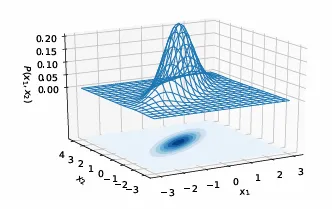

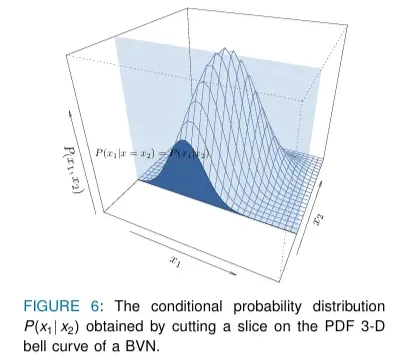
BVN은

$\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \sim N \left( \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}, \begin{bmatrix} \sigma_{11} & \sigma_{12} \\ \sigma_{21} & \sigma_{22} \end{bmatrix} \right) = N(\mu, \Sigma)$

로 표현되어지며

BVN의 3D Visualization에서 단면으로 자르면 조건부 확률 분포 $P(x_1|x_2)$를 볼 수 있다.

위 3D 시각화의 x1, x2 평면의 타원 모양은 x1과 x2의 상관 정도를 나타내어 변수 간의 관계를 보여준다. 

## Kernel 함수(ex. RBF kernel)

두 데이터 포인트 간의 유사성을 측정하는 함수로 입력 데이터 간의 유사성을 측정하여 공분산 행렬을 형성한다. 이를 이용해 데이터 사이의 관계를 설명하는 데 사용되며 커널 함수의 하이퍼 파라미터(ex. RBF kenel의 길이 스케일 $l$ 및 수직 스케일 $\sigma_f$)는 모델의 유연성을 결정하고 생성된 covariant 행렬을 이용하여 계산되는 로그 주변 likelihood 함수$(log p(y|X,θ))$를 사용하여 우도를 최대화하는 하이퍼파라미터를 학습하는 최적화를 진행해 데이터에 모델을 fitting한다.

## Non-Parametrci Model

유한한 수의 매개변수로 데이터 분포를 모델링하는 parametric 모델과 달리 매개변수의 수가 무한하며 Dataset이 늘어남에 따라 무한한 수의 함수들을 고려하여 모델을 구축하며, 매개변수의 수가 고정되지 않는다.

## Gacussian Process

관찰된 데이터 포인트에 맞는 함수들에 대한 확률 분포로 BI의 일종이다. 데이터가 관찰하기 전, 보통 MVN로 설정되는 함수들의 가정된 분포인 사전 분포와 GPR의 예측을 생성하는 데 사용되는 사후 분포의 개념이 들어있다.

주요 사항으로

1. 새로운 관찰로 사전 분포가 업데이트 된다.
- GP model은 가능한 함수들에 대한 확률 분포로, 임의의 finite sample 함수들은 공동 Gaussian 분포를 갖는다.
    
    두 개 이상의 확률 변수가 동시에 취할 수 있는 모든 가능한 조합에 대한 확률을 나타내는 분포. 여러 변수가 함께 발생할 확률을 표현할 수 있다. 이를 통해 변수 간의 관계를 파악할 수 있어 공동 분포를 이용해 조건분 분포 $P(Y|X)$를 구할 수 있다.
    
1. 가능한 함수들의 사후 분포로부터 파생된 평균 함수가 회귀 예측에 사용된다.

가 있다.

Covariant 행렬과 관찰된 데이터로 평균 함수와 kernel 함수의 매개변수를 학습하고 주어진 테스트 포인트에서 예측 값의 평균과 분산을 계산하여 결과를 생성한다.

다만, 계산 복잡도가 크고 Dataset이 클 경우 제곱으로 계산 비용이 증가하므로 대규모 데이터에 대해서는 sparse GPR을 적용할 수 있다.

다변량 가우시안으로 모델링된 회귀 함수는 $P(f∣X)=N(f∣μ,K)$로 주어지고 $X = [x_1, ..., x_n]$는 관찰된 데이터 포인트, $f=[f(x_1),...,f(x_n)]$는 함수 값, $μ=[m(x_1),...,m(x_n)]$는 평균 함수, 그리고  $K_{ij}=k(x_i,x_j)$는 양의 정부호 kernel 함수이다.

각 포인트 $x_i$들의 함수 출력 $f(x_i)$로부터 추정된 평균 함수 f가 주어졌을 때 새로운 포인트 $X_*$에서 $f(X_*)$을 예측하며 $f$와 $f_*$의 공동 분포는 

$\begin{bmatrix} f \\ f_* \end{bmatrix} \sim N \left( \begin{bmatrix} m(X) \\ m(X_*) \end{bmatrix}, \begin{bmatrix} K & K_*^T \\ K_* & K_{**} \end{bmatrix} \right)$ 로 표현된다.

이는 $X, X_*$에 대한 $f$와 $f_*$의 공동 확률 분포 $P(f,f_*|X,X_*)$을 설명하지만, 회귀에서는 $f_*$에 대한 조건부 분포 $P(F_*|f, X,X_*)$만 필요하다. 이는 MVN 이론의 주변 분포와 조건부 분포를 사용하여 다음과 같이 유도되어 진다.

$f∗∣f,X,X∗∼N(K_∗^TK^{−1}f,K_{∗∗}−K_∗^TK^{−1}K_∗)$

일반적으로 참 함수 값의 Noise가 있는 버전 $y = f(x) + \epsilon$, $\epsilon$: 분산 $\sigma^2_n$을 가지는 추가적 독립 동일 분포(i.i.d.) Gaussian Noise

에 대해 접근할 수 있으며 이에 대해서는 

$cov(y)=K+σ_n^2I$, 관찰된 값과 새로운 테스트 포인트에서의 함수 값의 공동 분포는 $\begin{bmatrix} y \\ f_* \end{bmatrix} \sim N \left( 0  , \begin{bmatrix} K+\sigma_n^2I & K_* \\ K_*^T & K_{**} \end{bmatrix} \right)$ 이다. 이에 조건부 분포를 유도하여 GPR을 위한 예측 방정식을 얻게 된다. 

$\bar{f_*} \mid X, y, X_* \sim N\left( \bar{f_*}, \operatorname{cov}(f_*) \right)$

## 조건부 확률

새로운 데이터에 대한 예측을 수행하기 위해 공동 분포에서 특정 조건에 맞는 분포를 추출하는 개념. 훈련 데이터가 주어졌을 때 조건분 확률 분포를 통해 새 데이터에 대한 예측 분포를 얻는다. 이는 데이터 포인트들 간의 상관 관계를 반영하여 예측 불확실성(분산)까지 제공한다.